In [168]:
import scipy.stats as stats 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import linalg
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

Our goal is to predict car prices in poland based on multiple variables

In [169]:
df = pd.read_csv(r'C:\Users\User\Documents\car_price.csv',index_col = 0)
df.head()


,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [170]:
df.shape

(117927, 10)

In [171]:
df["mark"].unique()

array(['opel', 'audi', 'bmw', 'volkswagen', 'ford', 'mercedes-benz',
       'renault', 'toyota', 'skoda', 'alfa-romeo', 'chevrolet', 'citroen',
       'fiat', 'honda', 'hyundai', 'kia', 'mazda', 'mini', 'mitsubishi',
       'nissan', 'peugeot', 'seat', 'volvo'], dtype=object)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117927 entries, 0 to 117926
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   mark             117927 non-null  object
 1   model            117927 non-null  object
 2   generation_name  87842 non-null   object
 3   year             117927 non-null  int64 
 4   mileage          117927 non-null  int64 
 5   vol_engine       117927 non-null  int64 
 6   fuel             117927 non-null  object
 7   city             117927 non-null  object
 8   province         117927 non-null  object
 9   price            117927 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 9.9+ MB


In [173]:
df.drop("generation_name",axis=1,inplace=True)  #we drop the genration_name column because it has missing values (87842) 
                                         #compared to the others(117927)

In [174]:
df.isna().sum()  #0 na values

mark          0
model         0
year          0
mileage       0
vol_engine    0
fuel          0
city          0
province      0
price         0
dtype: int64

In [175]:
df.isnull().sum()  #0 null values

mark          0
model         0
year          0
mileage       0
vol_engine    0
fuel          0
city          0
province      0
price         0
dtype: int64

In [176]:
df.drop_duplicates(keep='first', inplace=True) #deleting duplicate rows and keeping first occurence (keep="first")

In [177]:
df.nunique()    #model and city have too many values we can get rid of them

mark             23
model           328
year             54
mileage       35394
vol_engine      508
fuel              6
city           4427
province         23
price          9310
dtype: int64

In [178]:
df["price_usd"]= df["price"] * 0.22   #changing prices from zloty(poland currency) to usd
df.drop(columns=["city","model","province","price"],axis=1,inplace =True) # not useful columns
df.head()


,mark,year,mileage,vol_engine,fuel,price_usd
0,opel,2015,139568,1248,Diesel,7898.00000
1,opel,2018,31991,1499,Diesel,17270.22000
2,opel,2015,278437,1598,Diesel,5940.00000
3,opel,2016,47600,1248,Diesel,6776.00000
4,opel,2014,103000,1400,CNG,7898.00000


In [179]:
df.describe()

,year,mileage,vol_engine,price_usd
count,111166.00000,111166.00000,111166.00000,111166.00000
mean,2012.88361,141818.02699,1810.23683,15133.08850
std,5.65012,91686.85874,641.27809,18287.74386
min,1945.00000,0.00000,0.00000,110.00000
25%,2009.00000,69376.25000,1461.00000,4664.00000
50%,2013.00000,147000.00000,1781.00000,9130.00000
75%,2017.00000,203000.00000,1995.00000,17798.00000
max,2022.00000,2800000.00000,7600.00000,527978.00000


OBSERVATIONS: 

Prices ranges are between 110-527978 $ ,50% of car prices are less than 9130$ wich means half of car owners have a basic car.

In poland there are cars model from 1945 till 2022 and 75% of cars are from year 2009 and above wich means 75% of cars are not that old

In [180]:
df.groupby(['mark'])['price_usd'].agg({'median','mean','max'})

,mean,max,median
mark,,,
alfa-romeo,14474.84548,98315.80000,6072.00000
audi,23186.40478,242000.00000,13332.00000
bmw,26660.32309,242000.00000,15378.00000
chevrolet,8879.07983,122078.00000,5258.00000
citroen,7479.91945,43538.00000,5698.00000
fiat,8403.22560,85789.00000,6578.00000
ford,11163.13144,186780.00000,7480.00000
honda,10477.22911,44418.00000,7436.00000
hyundai,11774.64643,48224.00000,10098.00000


DEALING WITH OUTLIERS

<AxesSubplot:>

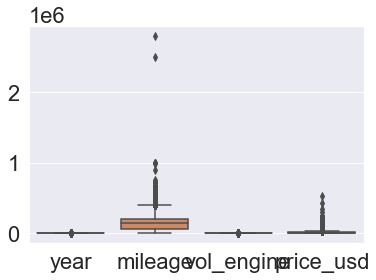

In [181]:
sns.boxplot(data=df)             #mileage and price_usd have many outliers

<AxesSubplot:xlabel='mileage', ylabel='Density'>

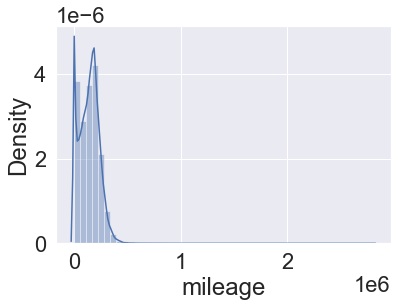

In [182]:
sns.distplot(df["mileage"])     #right skewed

<AxesSubplot:xlabel='price_usd', ylabel='Density'>

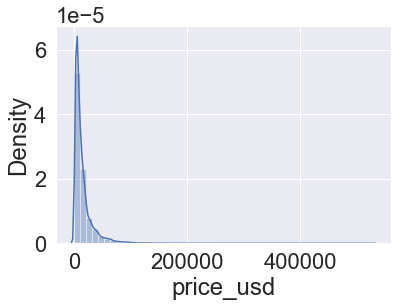

In [183]:
sns.distplot(df["price_usd"])   #right skewed

REMOVING OUTLIERS 


In [184]:
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)                  #because our 2 density plots are skewed we can take values between Q1-1.5*IQR and Q3+1.5*IQR
    IQR = Q3 - Q1
    
    low_bound = Q1 - 1.5 * IQR
    up_bound = Q3 + 1.5 * IQR
    ls= df.index[(df[ft] < low_bound) | (df[ft]> up_bound)]
    return ls

In [185]:
index_list = []
for feature in ['price_usd','mileage']:
    index_list.extend(outliers(df,feature))
index_list

[5032,
 5825,
 5834,
 5859,
 5868,
 5869,
 5879,
 5881,
 5890,
 5891,
 5894,
 5902,
 5915,
 5917,
 5921,
 5928,
 5931,
 5941,
 8689,
 8771,
 8809,
 8818,
 8846,
 8919,
 8936,
 8948,
 8997,
 12512,
 12545,
 13752,
 13756,
 13771,
 13782,
 13784,
 13839,
 13844,
 13895,
 14037,
 14039,
 14042,
 14048,
 14049,
 14051,
 14058,
 14061,
 14065,
 14069,
 14076,
 14077,
 14080,
 14082,
 14084,
 14087,
 14088,
 14096,
 14097,
 14100,
 14101,
 14102,
 14104,
 14105,
 14108,
 14109,
 14110,
 14112,
 14117,
 14118,
 15374,
 15912,
 16148,
 16400,
 16405,
 16411,
 16413,
 16420,
 16421,
 16429,
 16430,
 16446,
 16447,
 16453,
 16457,
 16459,
 16461,
 16464,
 16467,
 16468,
 16474,
 16483,
 16485,
 16487,
 16488,
 16492,
 16500,
 16502,
 16503,
 16505,
 16508,
 16515,
 16517,
 16518,
 16519,
 16522,
 16525,
 16528,
 16529,
 16530,
 16533,
 16534,
 16535,
 16536,
 16538,
 16539,
 16540,
 16541,
 16542,
 16543,
 16569,
 16573,
 16576,
 16578,
 16579,
 16583,
 16585,
 16589,
 16590,
 16596,
 16605,
 16

In [186]:
def remove(df,ls):
    ls = sorted(set(ls))
    df=df.drop(ls)
    return df
df = remove(df,index_list)
    

<AxesSubplot:>

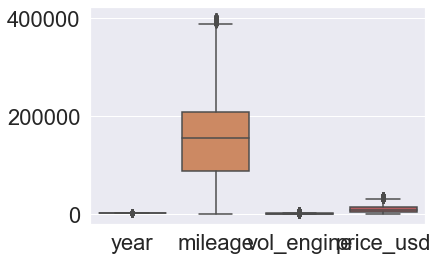

In [187]:
sns.boxplot(data=df)

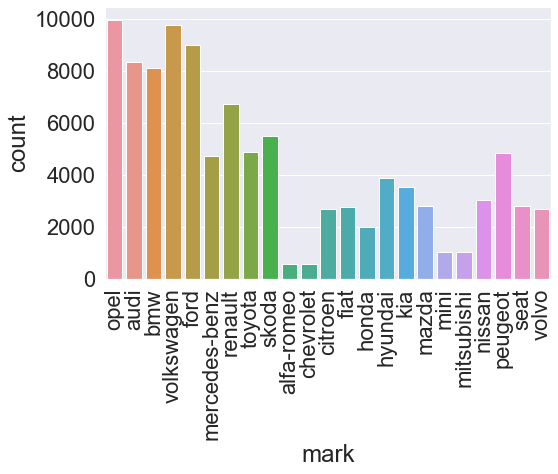

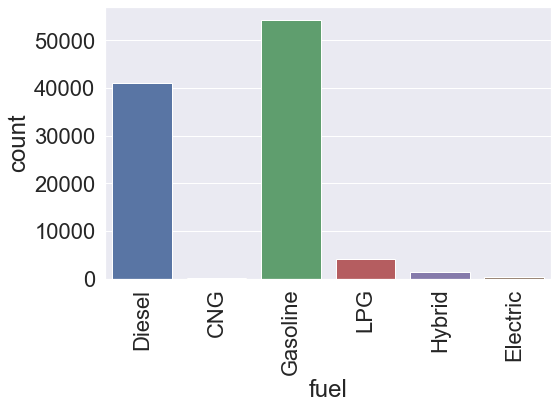

In [188]:
for column in df.columns:
    if df[column].dtype== 'object':  #top 4 cars are german cars ----> poland citizens like to drive german cars
        plt.figure(figsize=(8,5))    #most of the cars drive on gasoline and diesel
        sns.countplot(df[column])
        plt.xticks(rotation='90')
        plt.show()

Text(0.5, 1.0, 'Mark and Price')

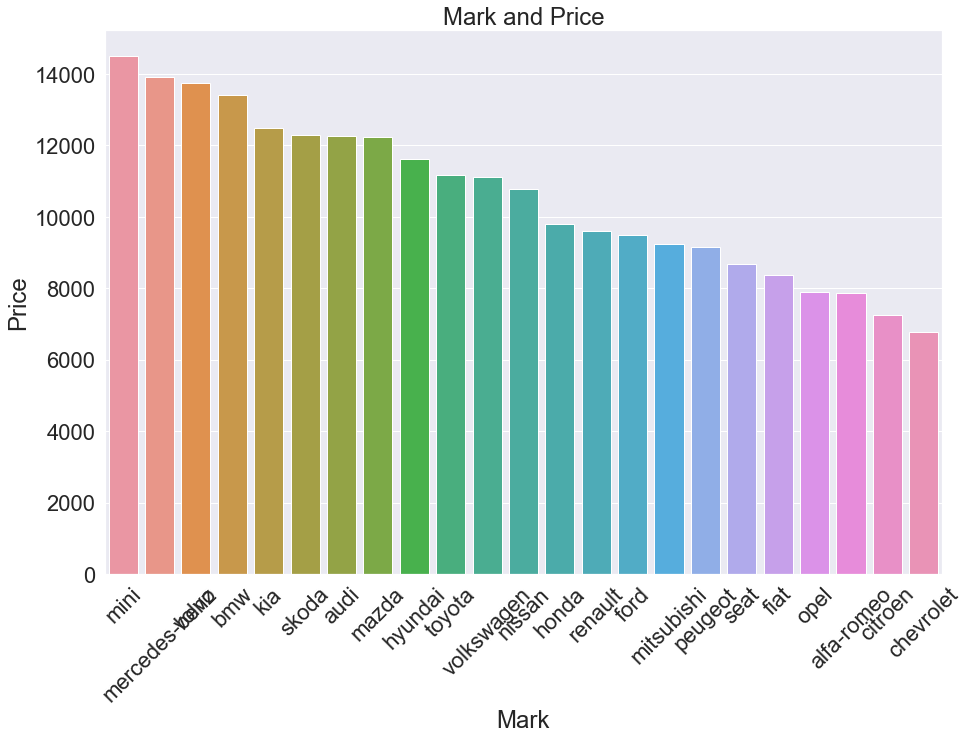

In [189]:
mark_list = list(df['mark'].unique())                  #ploting the average price of each car in descending order
mark_price = []
for i in mark_list:
    x = df[df['mark']==i]                              # 4 of the top 5 average car prices are german cars 
    price = sum(x.price_usd)/len(x)
    mark_price.append(price)
data = pd.DataFrame({'mark_list': mark_list,'mark_price':mark_price})
new_index = (data['mark_price'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['mark_list'], y=sorted_data['mark_price'])
plt.xticks(rotation= 45)
plt.xlabel('Mark')
plt.ylabel('Price')
plt.title('Mark and Price')

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'mileage'}>],
       [<AxesSubplot:title={'center':'vol_engine'}>,
        <AxesSubplot:title={'center':'price_usd'}>]], dtype=object)

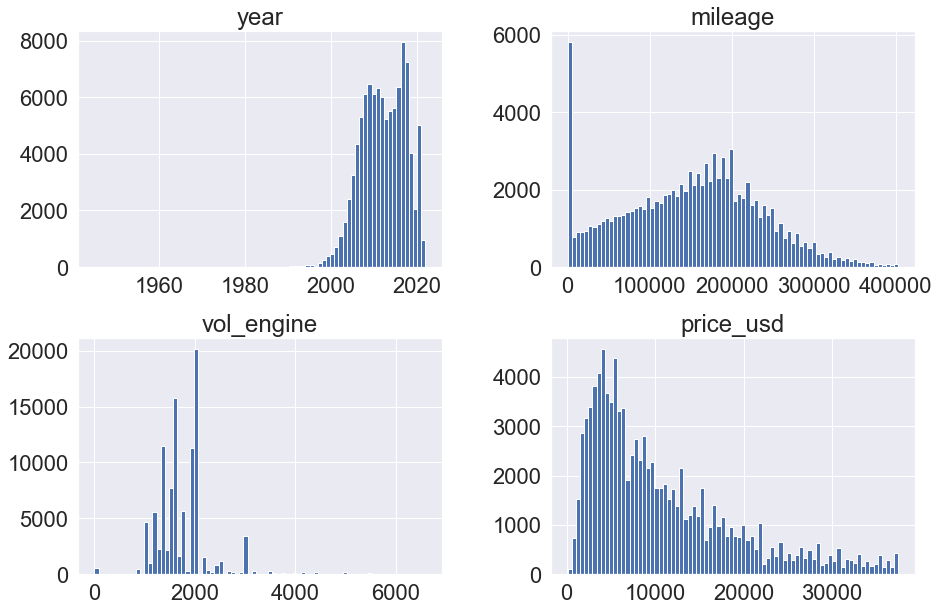

In [190]:
df.hist(bins=80, figsize=(15, 10))
#price_usd is right skewed
#Year is left skewed and has outilers on lower side
#Mileage is almost Normally distrubuted. Has few outliers on upper and lower side. Need to check further.

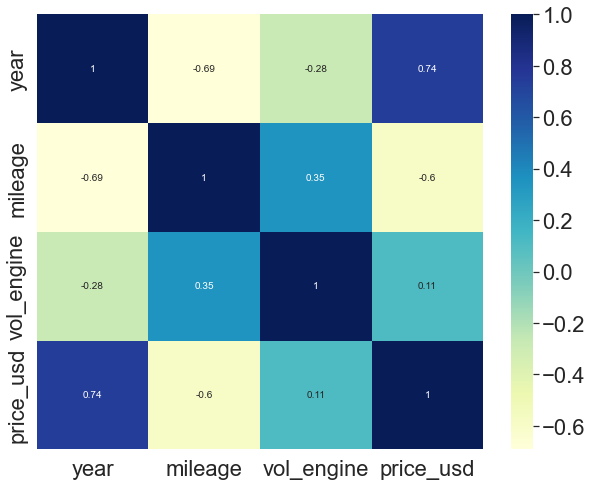

In [191]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True ,cmap="YlGnBu" )  
plt.show()
#Price is positively correlated with year and negatively correlated with mileage,vol_engine doesnt impact the price
#Miliage and year are negatively correlated

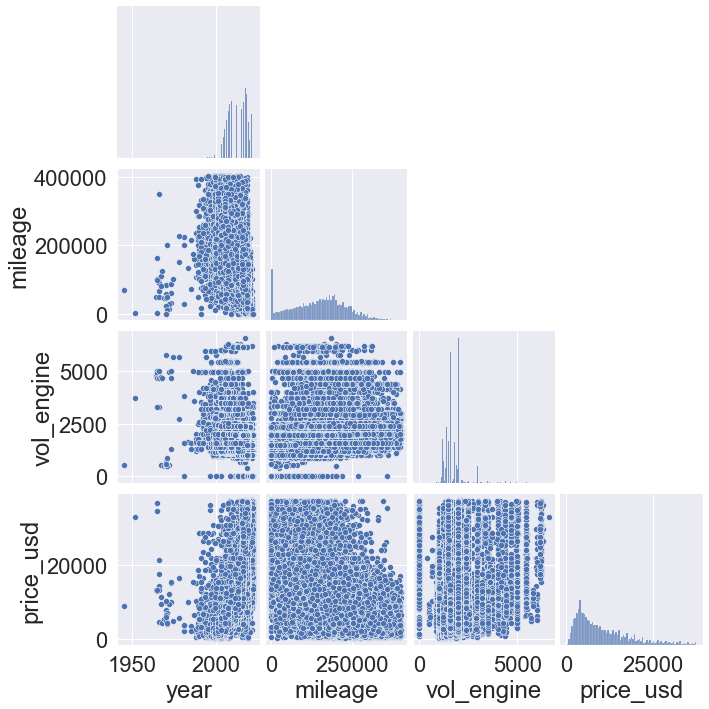

In [192]:
sns.pairplot(data=df , corner=True)
plt.show()          
#Same observation about correlation as seen in heatmap

<AxesSubplot:title={'center':'Price based on manufacturing Year of model'}, xlabel='year', ylabel='price_usd'>

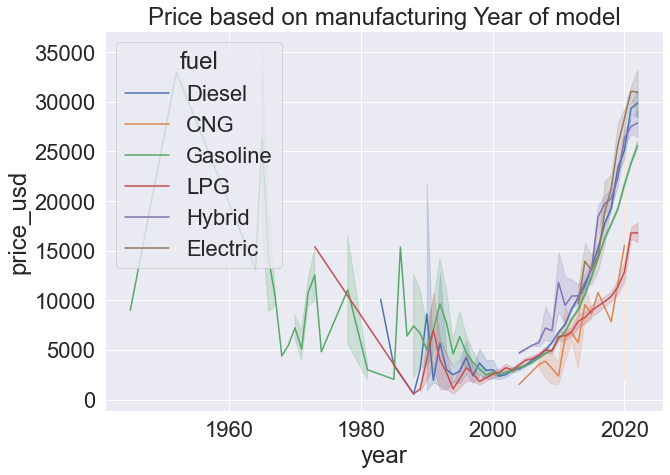

In [193]:
plt.figure(figsize=(10,7))
plt.title("Price based on manufacturing Year of model")
sns.lineplot(x='year', y='price_usd',hue="fuel",
             data=df)

#old cars use to run on diesel

<AxesSubplot:title={'center':'Price Vs Mileage'}, xlabel='mileage', ylabel='price_usd'>

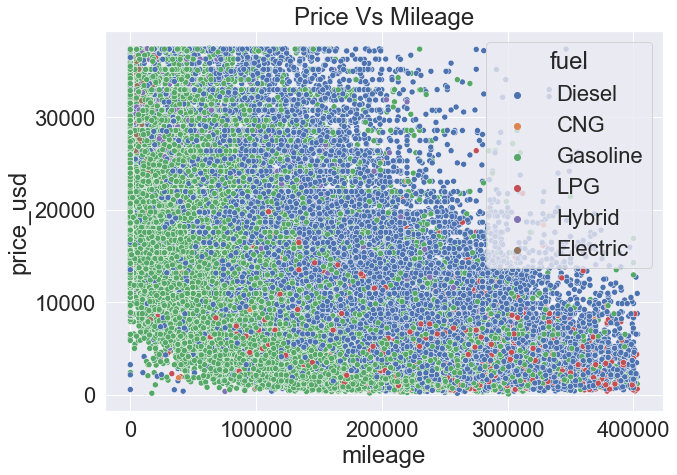

In [194]:
plt.figure(figsize=(10,7))
plt.title("Price Vs Mileage")
sns.scatterplot(y='price_usd', x='mileage', hue='fuel', data=df)

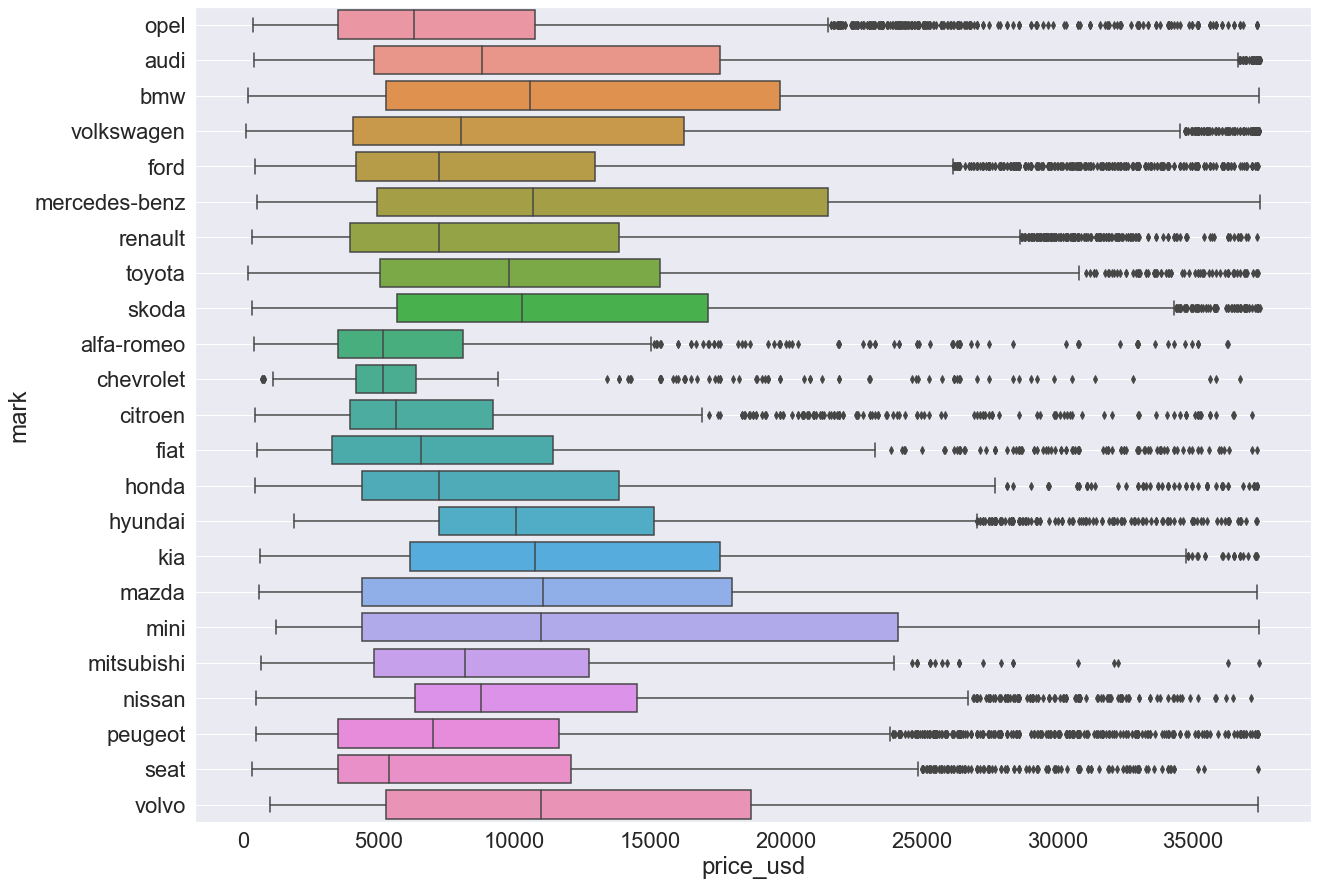

In [195]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.boxplot(x='price_usd', y='mark', data=df)
plt.grid()

#These are not outliers 

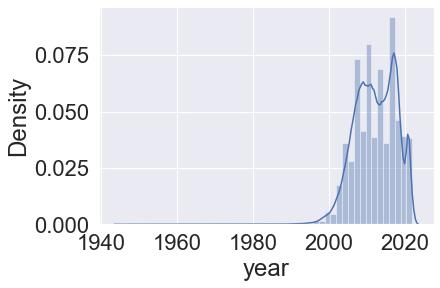

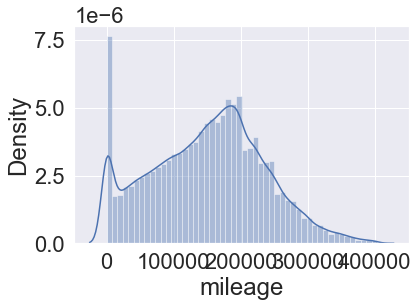

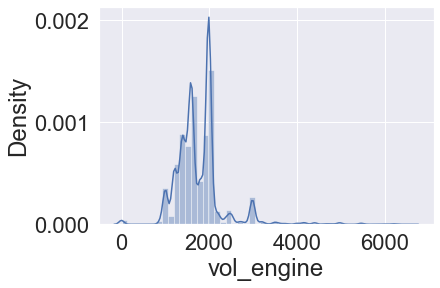

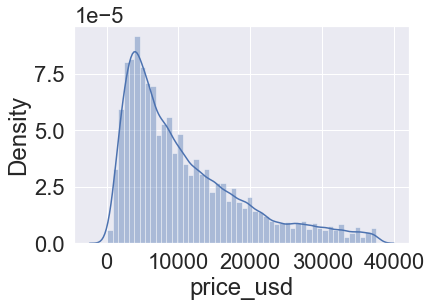

In [196]:
# check distrubution if skewed. If distrubution is skewed , its better to use log
cols_to_log = df.select_dtypes(include=np.number).columns.tolist()
for colname in cols_to_log:
    sns.distplot(df[colname], kde=True)
    plt.show()

In [197]:
df.drop("mark",axis=1,inplace=True)
df.head()

,year,mileage,vol_engine,fuel,price_usd
0,2015,139568,1248,Diesel,7898.00000
1,2018,31991,1499,Diesel,17270.22000
2,2015,278437,1598,Diesel,5940.00000
3,2016,47600,1248,Diesel,6776.00000
4,2014,103000,1400,CNG,7898.00000


<AxesSubplot:xlabel='price_usd', ylabel='Density'>

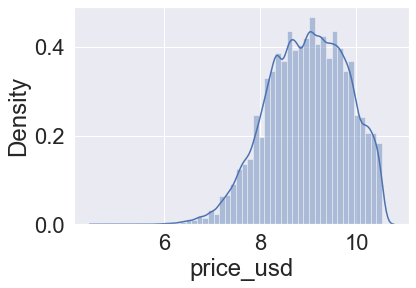

In [198]:
sns.distplot(np.log(df["price_usd"]))
# More normal than the one without log

In [199]:
df_model = pd.get_dummies(df["fuel"],drop_first=True)
#get_dummies ----> convert categorical variables into dummy or indicator variables.

In [200]:
dff=pd.concat([df,df_model],axis=1)
del dff["fuel"]
dff.head()
dff["log_price"] = np.log(df["price_usd"])    #creating a column

In [201]:
x = dff.drop( ["log_price","price_usd"], axis=1)
y = dff["log_price"]
#We will be predicting the log_price value

In [202]:
import statsmodels.api as sm
x= sm.add_constant(x)  #sm.add_constant(x) will take a dataframe and add an initial column 'const' with 1.0 in it.
y= dff["log_price"]

In [203]:
from sklearn.model_selection import train_test_split   
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [204]:
model = sm.OLS(y,x).fit()   #Ordinary Least Squares regression (OLS) is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable (simple or multiple linear regression).
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                 5.662e+04
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:19:15   Log-Likelihood:                -37545.
No. Observations:              101271   AIC:                         7.511e+04
Df Residuals:                  101262   BIC:                         7.519e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -237.7155      0.626   -380.040      0.000    -238.941    -236.490
year           0.1221      0.000    396.323      0.000       0.122       0.123
mileage    -1.665e-06   2.13e-08    -78.234      0.000   -1.71e-06   -1.62e-06
vol_engine     0.0006   2.14e-06    275.132      0.000       0.001       0.001
Diesel         0.1742      0.054      3.218      0.001       0.068       0.280
Electric       1.2324      0.057     21.731      0.000       1.121       1.344
Gasoline       0.1507      0.054      2.783      0.005       0.045       0.257
Hybrid         0.1915      0.055      3.487      0.000       0.084       0.299
LPG            0.0821      0.054      1.510      0.131      -0.024       0.189
==============================================================================
Omnibus:                    39584.582   Durbin-Watson:                   1.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2240501.850
Skew:                           1.091   Prob(JB):                         0.00
Kurtosis:                      25.939   Cond. No.                     9.82e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.82e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

.Both the R-squared and Adjusted R squared of our model are very high. This is a clear indication that we have been able to create a very good model that is able to explain variance in price of used cars for upto 89%

.The model is not an underfitting or overfitting model.

.To be able to make statistical inferences from our model, we will have to test that the linear regression assumptions are followed.

.Before we move on to assumption testing, we'll do a quick performance check on the test data.

In [205]:
#removing columns with p-value>0.05    we will remove LPG
dff.drop("LPG",axis=1,inplace=True)

In [206]:
#Repeating the same process but without LPG
x = dff.drop( ["log_price","price_usd"], axis=1)
y = dff["log_price"]

In [207]:
import statsmodels.api as sm
x= sm.add_constant(x)
y= dff["log_price"]

In [208]:
from sklearn.model_selection import train_test_split   
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
dff.head()

,year,mileage,vol_engine,price_usd,Diesel,Electric,Gasoline,Hybrid,log_price
0,2015,139568,1248,7898.00000,1,0,0,0,8.97436
1,2018,31991,1499,17270.22000,1,0,0,0,9.75674
2,2015,278437,1598,5940.00000,1,0,0,0,8.68946
3,2016,47600,1248,6776.00000,1,0,0,0,8.82114
4,2014,103000,1400,7898.00000,0,0,0,0,8.97436


In [209]:
model = sm.OLS(y,x).fit()  
model.summary() 
#All p-values are less than 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                 6.470e+04
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:19:15   Log-Likelihood:                -37546.
No. Observations:              101271   AIC:                         7.511e+04
Df Residuals:                  101263   BIC:                         7.518e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -237.6240      0.623   -381.687      0.000    -238.844    -236.404
year           0.1221      0.000    396.328      0.000       0.122       0.123
mileage    -1.665e-06   2.13e-08    -78.246      0.000   -1.71e-06   -1.62e-06
vol_engine     0.0006   2.14e-06    275.161      0.000       0.001       0.001
Diesel         0.0929      0.006     15.972      0.000       0.082       0.104
Electric       1.1512      0.018     63.938      0.000       1.116       1.186
Gasoline       0.0694      0.006     11.989      0.000       0.058       0.081
Hybrid         0.1103      0.011     10.007      0.000       0.089       0.132
==============================================================================
Omnibus:                    39571.094   Durbin-Watson:                   1.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2240095.868
Skew:                           1.090   Prob(JB):                         0.00
Kurtosis:                      25.937   Cond. No.                     9.77e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.77e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [210]:
dff.head()

,year,mileage,vol_engine,price_usd,Diesel,Electric,Gasoline,Hybrid,log_price
0,2015,139568,1248,7898.00000,1,0,0,0,8.97436
1,2018,31991,1499,17270.22000,1,0,0,0,9.75674
2,2015,278437,1598,5940.00000,1,0,0,0,8.68946
3,2016,47600,1248,6776.00000,1,0,0,0,8.82114
4,2014,103000,1400,7898.00000,0,0,0,0,8.97436


In [211]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train)  
y_pred= regressor.predict(x_train) 

In [212]:
#Model accuracy
print('Train Score: ', regressor.score(x_train, y_train))  
print('Test Score: ', regressor.score(x_test, y_test)) 
#The accuracy score represents the the coefficient of determination(R square).R square is measure of how close the data are to the fitted regression line.

#The root mean squared error
print("The RMSE on the training data set :",np.sqrt(mean_squared_error(y_train,y_pred)))
print("The RMSE on the testing data set :",np.sqrt(mean_squared_error(y_test,regressor.predict(x_test))))
#The RMSE is the standart deviation of the residuals.Residuals is the difference between the predicted values and the regression line


#The mean absolute error
print("The MAE on the training data set :",np.sqrt(mean_absolute_error(y_train,y_pred)))
print("The MAE on the testing data set :",np.sqrt(mean_absolute_error(y_test,regressor.predict(x_test))))
#The mean absolute value is the average of all absolute errors.The absolute error is the difference between the true value (y_train) and the predicted value(y_pred)

print("Intercept",regressor.intercept_)
#The intercept is the expected mean value of Y when all X=0

print("Coefficient",regressor.coef_)
#Coefficients are the weight


Train Score:  0.8152316757444624
Test Score:  0.825187353770565
The RMSE on the training data set : 0.35223194460602936
The RMSE on the testing data set : 0.3440306672866015
The MAE on the training data set : 0.5065903782682014
The MAE on the testing data set : 0.5064482025847971
Intercept -235.14584166079558
Coefficient [ 0.00000000e+00  1.20893469e-01 -1.73665854e-06  5.92442571e-04
  9.11167395e-02  1.15254368e+00  6.41545285e-02  1.04471354e-01]


Root Mean Squared Error of train and test data is not different, indicating that our model is not overfitting the train data.


Test Assumptions

Checking the Linear Regression Assumption:
   1) No Multicollinearity  
   2) Mean of residuals should be 0  
   3) No Heteroscedasticity   
   4) Normality of error terms

Checking Assumption 1: No Multicollinearity
We will use VIF, to check if there is multicollinearity in the data.

Features having a VIF score >5 will be dropped/treated till all the features have a VIF score <5


In [213]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

In [214]:
print(checking_vif(x_train))

      feature          VIF
0       const 317778.60274
1        year      2.28585
2     mileage      2.66274
3  vol_engine      1.22411
4      Diesel      6.72177
5    Electric      1.16278
6    Gasoline      6.86663
7      Hybrid      1.36902


We have removed multicollinearity from the data now.Some Fuel variables are showing  vif > 5 because most cars are either diesel and gasoline. These two features are correlated with each other.

We will not drop this variable from the model because this will not affect the interpretation of other features in the model.

Checking Assumption 2: Mean of residuals should be 0

In [215]:
residuals = model.resid
print(residuals)
np.mean(residuals)   #Its 0

0        -0.06904
1         0.01973
2        -0.32920
3        -0.49753
4        -0.00459
           ...   
117247    0.51066
117251    0.63809
117252    0.77809
117253    0.77607
117254    0.58824
Length: 101271, dtype: float64


-9.258445833318894e-13

Checking Assumption 3: No Heteroscedasticity

.Homoscedacity - If the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

.Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form a funnel shape or any other non symmetrical shape.

In [216]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals, x)
lzip(name, test)
#Since p-value > 0.05 we cannot reject the Null Hypothesis that the residuals are homoscedastic.

[('F statistic', 0.7675207269268047), ('p-value', 0.9999999999999999)]

Checking Assumption 4: Normality of error terms
The residuals should be normally distributed.

<AxesSubplot:ylabel='Density'>

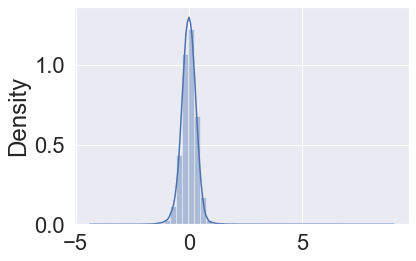

In [217]:
sns.distplot(residuals)

In [218]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                 6.470e+04
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:19:16   Log-Likelihood:                -37546.
No. Observations:              101271   AIC:                         7.511e+04
Df Residuals:                  101263   BIC:                         7.518e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -237.6240      0.623   -381.687      0.000    -238.844    -236.404
year           0.1221      0.000    396.328      0.000       0.122       0.123
mileage    -1.665e-06   2.13e-08    -78.246      0.000   -1.71e-06   -1.62e-06
vol_engine     0.0006   2.14e-06    275.161      0.000       0.001       0.001
Diesel         0.0929      0.006     15.972      0.000       0.082       0.104
Electric       1.1512      0.018     63.938      0.000       1.116       1.186
Gasoline       0.0694      0.006     11.989      0.000       0.058       0.081
Hybrid         0.1103      0.011     10.007      0.000       0.089       0.132
==============================================================================
Omnibus:                    39571.094   Durbin-Watson:                   1.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2240095.868
Skew:                           1.090   Prob(JB):                         0.00
Kurtosis:                      25.937   Cond. No.                     9.77e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.77e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observation of the model

With our linear regression model we have been able to capture ~82 variation in our data.

The model indicates that the most significant predictors of price of used cars are :

.year 
.Mileage
.Fuel

Newer cars sell for higher prices. 1 unit increase in year of the car leads to [ exp(0.1221) =  1.129867 ] decrease in the price of the vehicle.

Mileage is inversely correlated with Price. Generally, high mileage cars are the lower budget cars.
